In [2]:
# --- Install Necessary Libraries ---
!pip install --upgrade matplotlib
!pip install mediapipe tensorflow tensorflow-addons --no-cache-dir --force-reinstall
!pip install tensorflow==2.12 keras==2.12 tensorflow-addons==0.21.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 129.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 190.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 193.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 312.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 281.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 228.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 267.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 186.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 144.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 204.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 240.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 213.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.7 MB/s eta 0:00:00
  Atte

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# --- Imports ---
import os
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Dropout, Flatten, BatchNormalization, Reshape, Input, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow  # For Colab compatibility

/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
# --- MediaPipe Pose Estimation Setup ---
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose()

In [5]:
# Function to preprocess keypoints
def preprocess_keypoints(keypoints):
    keypoints = np.nan_to_num(keypoints)  # Replace NaN with zeros for invalid keypoints
    scaler = StandardScaler()  # Standardize (mean=0, std=1)
    keypoints = scaler.fit_transform(keypoints.reshape(-1, 1)).flatten()
    return keypoints

In [6]:
# Function to extract pose keypoints from an image and save the skeletonized image
def extract_pose_keypoints(image_path, save_folder, draw_skeleton=True):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Error: Could not load image at {image_path}")

    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        keypoints = []
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # Collect x, y, z

        # Draw the skeleton on the image
        if draw_skeleton:
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            os.makedirs(save_folder, exist_ok=True)
            filename = os.path.basename(image_path)
            save_path = os.path.join(save_folder, filename)
            cv2.imwrite(save_path, image)

        return np.array(keypoints)
    else:
        return None

In [7]:
# Function to prepare dataset
def prepare_dataset(image_folder, save_folder):
    X, y = [], []
    for label, class_value in zip(['improper-technique', 'proper-technique'], [0, 1]):
        folder_path = os.path.join(image_folder, label)
        save_label_folder = os.path.join(save_folder, label)
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            keypoints = extract_pose_keypoints(image_path, save_label_folder, draw_skeleton=True)
            if keypoints is not None:
                keypoints = preprocess_keypoints(keypoints)
                X.append(keypoints)
                y.append(class_value)
    return np.array(X), np.array(y)

In [8]:
# # --- Attention Mechanism ---
# class Attention(tf.keras.layers.Layer):
#     def __init__(self, **kwargs):  # Add **kwargs here
#         super(Attention, self).__init__(**kwargs)  # Pass **kwargs to super

#     def build(self, input_shape):
#         self.W = self.add_weight(shape=(input_shape[-1], 1), initializer="random_normal", trainable=True)
#         self.b = self.add_weight(shape=(1,), initializer="zeros", trainable=True)

#     def call(self, inputs):
#         score = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
#         attention_weights = tf.nn.softmax(score, axis=1)
#         return Multiply()([inputs, attention_weights])

#     # Add this method for serialization
#     def get_config(self):
#         config = super(Attention, self).get_config()
#         config.update({
#             'W': self.W.numpy(),  # Include weights in config
#             'b': self.b.numpy()
#         })
#         return config
# --- Attention Mechanism ---
class Attention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):  # Add **kwargs here
        super(Attention, self).__init__(**kwargs)  # Pass **kwargs to super

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], 1), initializer="random_normal", trainable=True, name='attention_W') # Added name
        self.b = self.add_weight(shape=(1,), initializer="zeros", trainable=True, name='attention_b') # Added name

    def call(self, inputs):
        score = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        attention_weights = tf.nn.softmax(score, axis=1)
        return Multiply()([inputs, attention_weights])

    # Add this method for serialization
    def get_config(self):
        config = super(Attention, self).get_config()
        # Instead of directly storing W and b, store their names
        config.update({
            'W_name': self.W.name,
            'b_name': self.b.name
        })
        return config

    # Add this static method for deserialization
    @classmethod
    def from_config(cls, config):
        # Create the layer instance
        instance = cls(**config)
        # Retrieve weights by name after layer creation
        instance.W = instance.add_weight(name=config['W_name'])
        instance.b = instance.add_weight(name=config['b_name'])
        return instance

In [9]:
# --- CNN-GRU Model with Attention ---
def build_cnn_gru_attention_model(input_shape):
    inputs = Input(shape=input_shape)

    # Reshape input for CNN
    reshaped = Reshape((input_shape[0], 1))(inputs)

    # CNN Block
    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(reshaped)
    x = MaxPooling1D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Flatten before GRU
    x = Flatten()(x)
    x = Reshape((1, -1))(x)  # Add time dimension for GRU

    # GRU Block
    x = GRU(256, return_sequences=True)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = GRU(128, return_sequences=True)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # Attention Layer
    x = Attention()(x)

    # Fully Connected Layers
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)

    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [10]:
# --- Main Script ---
image_folder = '/content/drive/MyDrive/ATP-Data'  # Original dataset
save_folder = '/content/drive/MyDrive/Preprocessed-Dataset'  # Save skeletonized images

# Prepare dataset
print("Preparing dataset and saving skeletonized images...")
X, y = prepare_dataset(image_folder, save_folder)
print(f"Dataset prepared: {X.shape} samples")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Build Model
input_shape = (X_train.shape[1], 1)
cnn_gru_attention_model = build_cnn_gru_attention_model(input_shape)

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
print("Training the CNN-GRU-Attention model...")
# cnn_gru_attention_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
cnn_gru_attention_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Preparing dataset and saving skeletonized images...
Dataset prepared: (172, 99) samples
Training the CNN-GRU-Attention model...
Epoch 1/50
4/4 [==============================] - 10s 514ms/step - loss: 1.0150 - accuracy: 0.5776 - val_loss: 0.6934 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 2/50
4/4 [==============================] - 0s 120ms/step - loss: 1.0499 - accuracy: 0.5172 - val_loss: 0.6930 - val_accuracy: 0.4333 - lr: 0.0010
Epoch 3/50
4/4 [==============================] - 1s 128ms/step - loss: 1.1323 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.4667 - lr: 0.0010
Epoch 4/50
4/4 [==============================] - 0s 115ms/step - loss: 1.2247 - accuracy: 0.4914 - val_loss: 0.6938 - val_accuracy: 0.4333 - lr: 0.0010
Epoch 5/50
4/4 [==============================] - 1s 149ms/step - loss: 0.8881 - accuracy: 0.6034 - val_loss: 0.6956 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 6/50
4/4 [==============================] - 1s 160ms/step - loss: 1.0527 - accuracy: 0.4741 - val_lo

In [ ]:
# Save the trained model
model_filename = "model1.keras"

# Use TensorFlow's SavedModel format
cnn_gru_attention_model.save(model_filename)
print(f"Model saved in SavedModel format at: {model_filename}")

# Test Function
def classify_tennis_stroke(image_path, thrshold=0.5):
    keypoints = extract_pose_keypoints(image_path, save_folder, draw_skeleton=True)
    if keypoints is not None:
        keypoints = preprocess_keypoints(keypoints)
        keypoints = np.expand_dims(keypoints, axis=0)
        prediction = cnn_gru_attention_model.predict(keypoints)[0][0]

        print(prediction)

        confidence = prediction * 100
        if prediction > thrshold:
            print(f"Improper technique detected with { confidence:.2f}% confidence.")
        else:
            print(f"Proper technique detected with {100 - confidence:.2f}% confidence.")
    else:
        print("No keypoints found in the image.")
# test_image_path = '/content/drive/MyDrive/ATP-Data/proper-technique/proper5.jpg'
# test_image_path = '/content/drive/MyDrive/ATP-Data/improper-technique/improper30.jpg'

test_images = [
    "/content/drive/MyDrive/ATP-Data/proper-technique/proper21.jpg",
    "/content/drive/MyDrive/ATP-Data/improper-technique/improper1.jpg",
    "/content/drive/MyDrive/ATP-Data/improper-technique/improper50.jpg"
]

for img in test_images:
    print(f"🔹 Testing {img}")
    classify_tennis_stroke(img)


# keypoints = extract_pose_keypoints(test_image_path, save_folder, draw_skeleton=True)

# if keypoints is not None:
#     print("✅ Extracted Keypoints:", keypoints[:10])  # Print first 10 keypoints
# else:
#     print("❌ No keypoints found! Model is getting empty input.")

# classify_tennis_stroke(test_image_path)

Model saved in SavedModel format at: model1.keras
🔹 Testing /content/drive/MyDrive/ATP-Data/proper-technique/proper21.jpg
1/1 [==============================] - 0s 23ms/step
0.46780777
Proper technique detected with 53.22% confidence.
🔹 Testing /content/drive/MyDrive/ATP-Data/improper-technique/improper1.jpg
No keypoints found in the image.
🔹 Testing /content/drive/MyDrive/ATP-Data/improper-technique/improper50.jpg
1/1 [==============================] - 0s 21ms/step
0.48582867
Proper technique detected with 51.42% confidence.


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = cnn_gru_attention_model.evaluate(X_test, y_test)

print(f"✅ Test Loss: {test_loss:.4f}")
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 [==============================] - 0s 38ms/step - loss: 0.6759 - accuracy: 0.6538
✅ Test Loss: 0.6759
✅ Test Accuracy: 65.38%


In [ ]:
from sklearn.metrics import classification_report

y_pred = cnn_gru_attention_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred))

1/1 [==============================] - 0s 29ms/step
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.71      0.67      0.69        15

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.66      0.65      0.66        26



In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

y_pred = cnn_gru_attention_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
report = classification_report(y_test, y_pred, output_dict=True)

df = pd.DataFrame(report).transpose()
df


1/1 [==============================] - 0s 33ms/step


,precision,recall,f1-score,support
0,0.583333,0.636364,0.608696,11.000000
1,0.714286,0.666667,0.689655,15.000000
accuracy,0.653846,0.653846,0.653846,0.653846
macro avg,0.648810,0.651515,0.649175,26.000000
weighted avg,0.658883,0.653846,0.655403,26.000000


1/1 [==============================] - 0s 62ms/step - loss: 0.6759 - accuracy: 0.6538
✅ Test Loss: 0.6759
✅ Test Accuracy: 65.38%


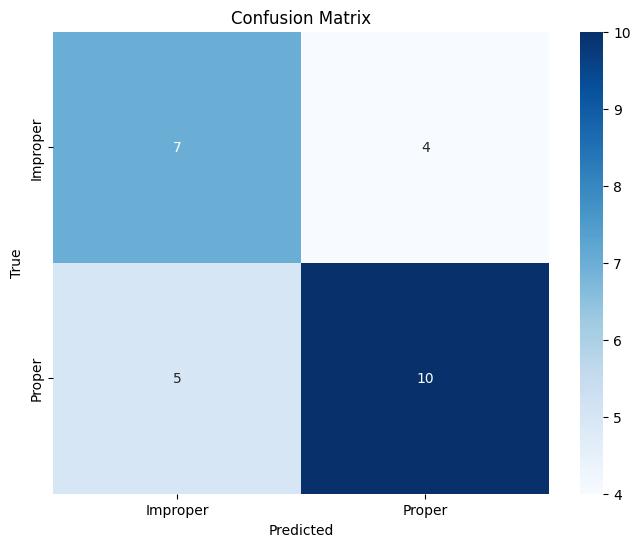

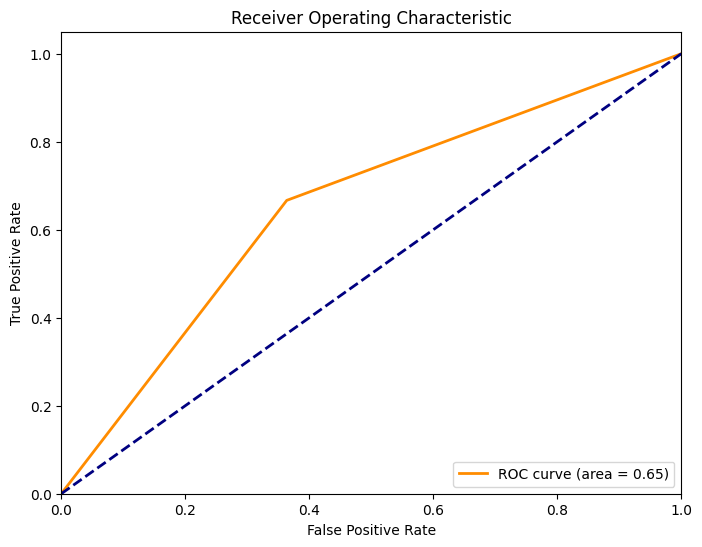

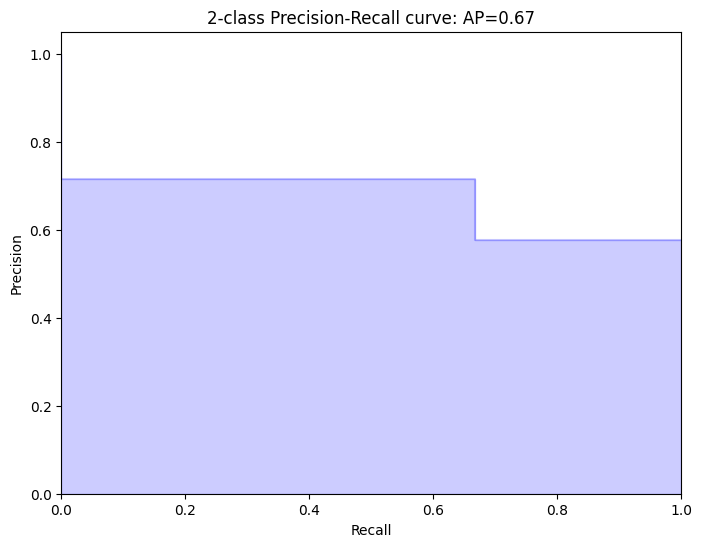

In [ ]:
# prompt: also add other relevant grpahs

import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code) ...

# Evaluate the model on test data
test_loss, test_accuracy = cnn_gru_attention_model.evaluate(X_test, y_test)

print(f"✅ Test Loss: {test_loss:.4f}")
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")

# ... (Your existing code) ...

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Improper', 'Proper'],
            yticklabels=['Improper', 'Proper'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)


plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')

plt.show()
